<a href="https://colab.research.google.com/github/zeharaY/Diabetes-Prediction-Classification-Project/blob/main/Diabetes-Prediction-Classification-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabetes Prediction Classification Project

> Add blockquote




### Problem Definition


Business/Research Problem: Diabetes is a chronic disease affecting millions worldwide. Early prediction can help in prevention and better management of the condition.

Goal: Build a classification model to predict whether a patient has diabetes based on diagnostic measurements.

Success Criteria:

Primary metric: Accuracy (target > 75%)

Secondary metrics: Precision, Recall, and F1-score

ROC-AUC score to evaluate overall model performance

### Data Collection

Using the "Diabetes Prediction Dataset" from Kaggle which contains diagnostic measurements for diabetes prediction.

In [ ]:
!pip install gdown
import gdown

# File ID
file_id = '1Ez0x5OK1PeLzy_GxKQL8yHayUvTjOu8Q'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file to my local environment
output = 'credit_score_data.csv'  # Choose a filename
gdown.download(url, output, quiet=False)

# Now read the downloaded CSV file
df = pd.read_csv(output)
df

Downloading...
From: https://drive.google.com/uc?id=1Ez0x5OK1PeLzy_GxKQL8yHayUvTjOu8Q
To: /content/credit_score_data.csv
100%|██████████| 1.03M/1.03M [00:00<00:00, 11.2MB/s]


,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,...,60.3,88.7,19.1,6.1,Low,3582,NaN,Former,1,1
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,...,72.3,200.0,37.1,3.5,Low,2206,NaN,Never,1,1
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,...,69.8,156.1,85.8,4.9,High,3175,Heavy,Former,1,1
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,...,74.2,110.9,25.3,5.2,High,3478,Moderate,Never,1,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_csv('credit_score_data.csv')

# Initial exploration
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0           0   58  Female     White  35.8                 83.4   
1           1   48    Male     Asian  24.1                 71.4   
2           2   34  Female     Black  25.0                113.8   
3           3   62    Male     Asian  32.7                100.4   
4           4   27  Female     Asian  33.5                110.8   

   Fasting_Blood_Glucose  HbA1c  Blood_Pressure_Systolic  \
0                  123.9   10.9                      152   
1                  183.7   12.8                      103   
2                  142.0   14.5                      179   
3                  167.4    8.8                      176   
4                  146.4    7.1                      122   

   Blood_Pressure_Diastolic  ...  Cholesterol_HDL  Cholesterol_LDL   GGT  \
0                       114  ...             50.2             99.2  37.5   
1                        91  ...             62.0            146.4  88.5   
2       

###Exploratory Data Analysis (EDA)


sum of null values for each column 
Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64


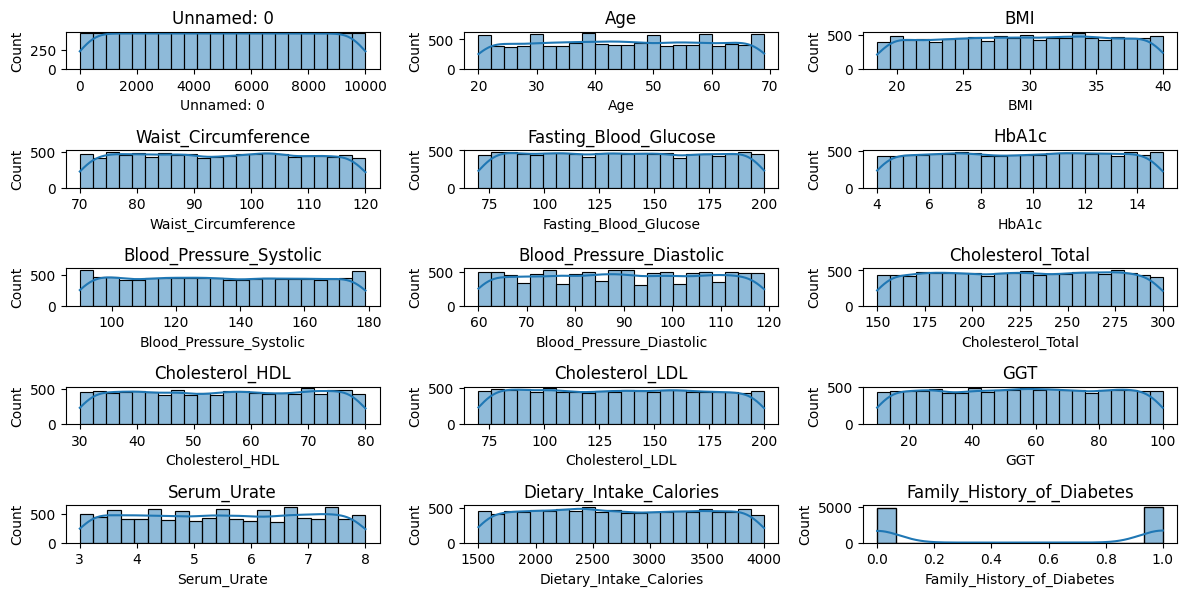

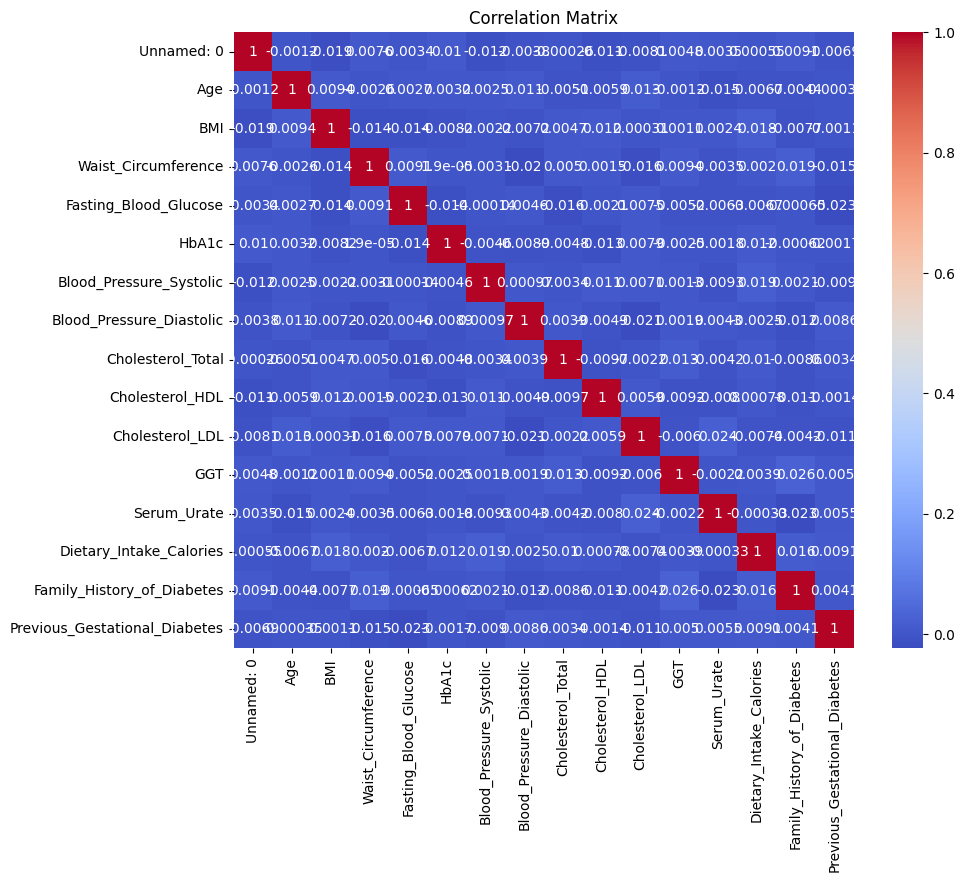

In [ ]:
# Check for missing values
print('sum of null values for each column ')
print(df.isnull().sum())

# Check class distribution
#print(df['diabetes'].value_counts())

# Visualize distributions
plt.figure(figsize=(12, 8))
num_cols = len(df.columns) - 1
rows = (num_cols // 3) + (num_cols % 3 > 0)

# Calculate the number of rows needed
# Filter out non-numeric columns for correlation and visualization
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
for i, col in enumerate(numeric_df.columns[:-1]):  # Iterate through numeric columns
    plt.subplot(rows, 3, i + 1)
    sns.histplot(numeric_df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

# Correlation matrix for numeric columns only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')  # Use numeric_df for corr()
plt.title('Correlation Matrix')
plt.show()

#### Data Cleaning:

##### Handling missing values

Since the value of the missing data is none numeric lets replace the Nan values with the mode value

In [ ]:
# Replace Alcohol_Consumption column missing values with mode value
df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0], inplace=True)

# Check for missing values again
print('sum of null values for each column ')
print(df.isnull().sum())

sum of null values for each column 
Unnamed: 0                       0
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
dtype: int64


##### Handling Outliers


The dataset contains health-related variables, where outliers and inconsistencies can significantly impact analysis.

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Check outliers in BMI
outliers_bmi = detect_outliers_iqr(df, 'BMI')
print(f"Outliers in BMI: {len(outliers_bmi)}")

outliers_Age = detect_outliers_iqr(df, 'Age')
print(f"Outliers in Age: {len(outliers_Age)}")

outliers_Waist_Circumference = detect_outliers_iqr(df, 'Waist_Circumference')
print(f"Outliers in Waist_Circumference: {len(outliers_Waist_Circumference)}")

outliers_Fasting_Blood_Glucose = detect_outliers_iqr(df, 'Fasting_Blood_Glucose')
print(f"Outliers in Fasting_Blood_Glucose: {len(outliers_Fasting_Blood_Glucose)}")

outliers_HbA1c = detect_outliers_iqr(df, 'HbA1c')
print(f"Outliers in HbA1c: {len(outliers_HbA1c)}")

outliers_Blood_Pressure_Systolic = detect_outliers_iqr(df, 'Blood_Pressure_Systolic')
print(f"Outliers in Blood_Pressure_Systolic: {len(outliers_Blood_Pressure_Systolic)}")

outliers_Blood_Pressure_Diastolic = detect_outliers_iqr(df, 'Blood_Pressure_Diastolic')
print(f"Outliers in Blood_Pressure_Diastolic: {len(outliers_Blood_Pressure_Diastolic)}")

outliers_Cholesterol_Total = detect_outliers_iqr(df, 'Cholesterol_Total')
print(f"Outliers in Cholesterol_Total: {len(outliers_Cholesterol_Total)}")

outliers_Cholesterol_HDL = detect_outliers_iqr(df, 'Cholesterol_HDL')
print(f"Outliers in Cholesterol_HDL: {len(outliers_Cholesterol_HDL)}")

outliers_Cholesterol_LDL = detect_outliers_iqr(df, 'Cholesterol_LDL')
print(f"Outliers in Cholesterol_LDL: {len(outliers_Cholesterol_LDL)}")

outliers_GGT = detect_outliers_iqr(df, 'GGT')
print(f"Outliers in GGT: {len(outliers_GGT)}")

outliers_Serum_Urate = detect_outliers_iqr(df, 'Serum_Urate')
print(f"Outliers in Serum_Urate: {len(outliers_Serum_Urate)}")

outliers_Dietary_Intake_Calories = detect_outliers_iqr(df, 'Dietary_Intake_Calories')
print(f"Outliers in Dietary_Intake_Calories: {len(outliers_Dietary_Intake_Calories)}")

outliers_Previous_Gestational_Diabetes = detect_outliers_iqr(df, 'Previous_Gestational_Diabetes')
print(f"Outliers in Previous_Gestational_Diabetes: {len(outliers_Previous_Gestational_Diabetes)}")

outliers_Family_History_of_Diabetes = detect_outliers_iqr(df, 'Family_History_of_Diabetes')
print(f"Outliers in Family_History_of_Diabetes: {len(outliers_Family_History_of_Diabetes)}")

Outliers in BMI: 0
Outliers in Age: 0
Outliers in Waist_Circumference: 0
Outliers in Fasting_Blood_Glucose: 0
Outliers in HbA1c: 0
Outliers in Blood_Pressure_Systolic: 0
Outliers in Blood_Pressure_Diastolic: 0
Outliers in Cholesterol_Total: 0
Outliers in Cholesterol_HDL: 0
Outliers in Cholesterol_LDL: 0
Outliers in GGT: 0
Outliers in Serum_Urate: 0
Outliers in Dietary_Intake_Calories: 0
Outliers in Previous_Gestational_Diabetes: 0
Outliers in Family_History_of_Diabetes: 0


No Outliers found

##### Feature Engineering:

Based on the columns available, the most medically relevant approach would be to create a diabetes classification based on standard diagnostic criteria:
To create a diabetes classification based on standard diagnostic criteria, we would use medically accepted guidelines from organizations like the American Diabetes Association (ADA), World Health Organization (WHO), or International Diabetes Federation (IDF). The key diagnostic markers for diabetes typically include:

Key Diagnostic Criteria for Diabetes Classification include
1. Fasting Plasma Glucose (FPG)

  Diabetes: ≥ 126 mg/dL (7.0 mmol/L)

  Normal: < 100 mg/dL (< 5.6 mmol/L)

2. Hemoglobin A1c (HbA1c)

  Diabetes: ≥ 6.5% (48 mmol/mol)

  Normal: < 5.7% (< 39 mmol/mol)

Base on these values we will assign the value to diabetes(our new target variable)


In [ ]:
import pandas as pd
import numpy as np

# Create diabetes target variable based on clinical thresholds
df['diabetes'] = np.where(
    (df['Fasting_Blood_Glucose'] >= 126) |  # Fasting glucose ≥ 126 mg/dL
    (df['HbA1c'] >= 6.5),                  # HbA1c ≥ 6.5%
    1,  # Diabetes
    0   # No diabetes
)

# Verify the distribution
print("Diabetes distribution:")
print(df['diabetes'].value_counts(normalize=True))

# Drop the intermediate columns if needed
# df = df.drop(['Fasting_Blood_Glucose', 'HbA1c'], axis=1)

Diabetes distribution:
diabetes
1    0.9047
0    0.0953
Name: proportion, dtype: float64


In [ ]:
df

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,45,Female,Asian,39.4,114.0,76.2,13.4,109,82,...,88.7,19.1,6.1,Low,3582,Moderate,Former,1,1,1
9996,9996,41,Female,Asian,21.0,71.3,77.1,12.9,154,72,...,200.0,37.1,3.5,Low,2206,Moderate,Never,1,1,1
9997,9997,50,Female,Asian,29.0,106.3,97.5,4.9,122,61,...,156.1,85.8,4.9,High,3175,Heavy,Former,1,1,0
9998,9998,62,Female,White,27.3,119.9,89.0,11.5,99,115,...,110.9,25.3,5.2,High,3478,Moderate,Never,1,0,1


##### Data Splitting

In [ ]:
# ====== DATA SPLITTING & SCALING ======
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.to_csv('train.csv', index=False)
df_test.to_csv('test.csv', index=False)

print(f"Training set rows: {len(df_train)}")
print(f"Test set rows: {len(df_test)}")

Training set rows: 8000
Test set rows: 2000


#### Algorithm Selection

selecting models used for Supervised ML Models like Logistic Regression, Random Forest and SVM since it is Supervised ML Process.


##### Model Development and Training

In [ ]:
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, roc_curve,
                            precision_recall_curve, average_precision_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# define numeric columns
numeric_cols = ['Age', 'BMI', 'Waist_Circumference', 'Blood_Pressure_Systolic',
               'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
               'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Dietary_Intake_Calories',
                'Previous_Gestational_Diabetes', 'Fasting_Blood_Glucose', 'HbA1c',
                'Family_History_of_Diabetes']

# define categorical columns to be label encoded
categorical_cols = ['Sex', 'Smoking_Status', 'Alcohol_Consumption',
                   'Physical_Activity_Level', 'Ethnicity']


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Reset index to ensure columns are correctly referenced after loading from CSV
X_train = X_train.reset_index(drop=True)  # Reset index for X_train
X_test = X_test.reset_index(drop=True)    # Reset index for X_test


# Fit and transform categorical features in both training and testing sets
for col in categorical_cols:
    # Access column using its name
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Scale numerical features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train) # Apply SMOTE after encoding categorical features

# ====== MODEL TRAINING ======
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42)
}


##### Model Evaluation and Hyperparameter Tuning


=== Training Logistic Regression ===
Accuracy: 0.9515
ROC AUC: 0.9892
Average Precision: 0.9989
              precision    recall  f1-score   support

           0       0.68      0.93      0.79       191
           1       0.99      0.95      0.97      1809

    accuracy                           0.95      2000
   macro avg       0.84      0.94      0.88      2000
weighted avg       0.96      0.95      0.95      2000



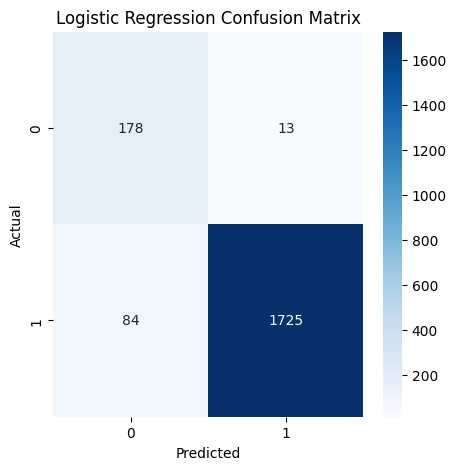


=== Training Random Forest ===
Accuracy: 0.9985
ROC AUC: 1.0000
Average Precision: 1.0000
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       191
           1       1.00      1.00      1.00      1809

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



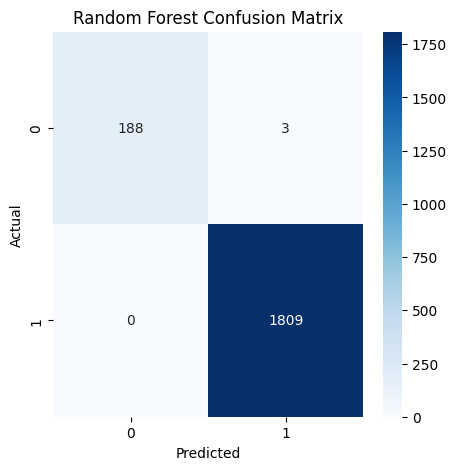


=== Training SVM ===
Accuracy: 0.4625
ROC AUC: 0.4994
Average Precision: 0.9036
              precision    recall  f1-score   support

           0       0.10      0.56      0.17       191
           1       0.91      0.45      0.60      1809

    accuracy                           0.46      2000
   macro avg       0.50      0.51      0.38      2000
weighted avg       0.83      0.46      0.56      2000



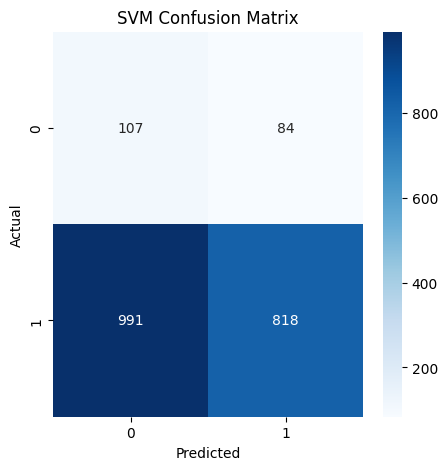

In [ ]:
results = {}
for name, model in models.items():
    print(f"\n=== Training {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]


# Store results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'precision': average_precision_score(y_test, y_prob),
        'model': model
    }

    # Print metrics
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"ROC AUC: {results[name]['roc_auc']:.4f}")
    print(f"Average Precision: {results[name]['precision']:.4f}")
    print(classification_report(y_test, y_pred))

  # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



###### Identify underfitting or overfitting issues.

In [ ]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.50
Test Accuracy: 0.46


Optimize model performance by fine-tuning hyperparameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# ====== Feature Engineering & Preprocessing ======
# (Add this before model training)
# Example: Create interaction terms (BMI x Glucose)
X_train['BMI_x_Glucose'] = X_train['BMI'] * X_train['Fasting_Blood_Glucose']
X_test['BMI_x_Glucose'] = X_test['BMI'] * X_test['Fasting_Blood_Glucose']

# ====== Model Training with Optimized Hyperparameters ======
models = {
    # 1. Logistic Regression (with polynomial features and reduced regularization)
    'Logistic Regression': make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=2, include_bias=False),  # Add non-linearity
        LogisticRegression(
            C=10.0,  # Reduced regularization (default C=1.0)
            max_iter=1000,
            class_weight='balanced',
            random_state=42
        )
    ),

    # 2. Random Forest (deeper trees, more estimators)
    'Random Forest': RandomForestClassifier(
        n_estimators=200,  # Increased from default (100)
        max_depth=10,      # Deeper trees (default=None, grows until pure)
        min_samples_split=5,  # Fewer samples to force splits
        class_weight='balanced',
        random_state=42
    ),

    # 3. SVM (with RBF kernel and scaling)
    'SVM': make_pipeline(
        StandardScaler(),  # Critical for SVM
        SVC(
            kernel='rbf',  # Non-linear decision boundary
            C=1.0,         # Balance margin vs. errors
            class_weight='balanced',
            probability=True,
            random_state=42
        )
    )
}

# ====== Evaluate Models ======
results = {}
for name, model in models.items():
    # Cross-validation to check generalization
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Fit on full training data
    model.fit(X_train, y_train)

    # Training and test accuracy
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    results[name] = {
        'CV Mean Accuracy': np.mean(cv_scores),
        'CV Std': np.std(cv_scores),
        'Training Accuracy': train_acc,
        'Test Accuracy': test_acc
    }

    # Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='Test Accuracy', ascending=False))

                     CV Mean Accuracy    CV Std  Training Accuracy  \
Random Forest                0.997859  0.004282           1.000000   
Logistic Regression          0.985150  0.016144           0.999724   
SVM                          0.981557  0.008803           0.994128   

                     Test Accuracy  
Random Forest               0.9990  
Logistic Regression         0.9770  
SVM                         0.9645  


Check for underfitting or overfitting issues again

In [ ]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.99
Test Accuracy: 0.96


#### Model Testing and Deployment

##### Final Model Evaluation

Before deployment, thoroughly test the model on the test dataset.



In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba),
}

print("Test Performance:")
print(pd.DataFrame([metrics]))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Performance:
   Accuracy  Precision    Recall  F1-Score   ROC-AUC
0    0.9645   0.987654  0.972913  0.980228  0.989118

Confusion Matrix:
[[ 169   22]
 [  49 1760]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       191
           1       0.99      0.97      0.98      1809

    accuracy                           0.96      2000
   macro avg       0.88      0.93      0.90      2000
weighted avg       0.97      0.96      0.97      2000



######Key Observations:
  1. High Overall Accuracy (96.45%)

    The model correctly classifies 96.45% of all test samples.

  2. Excellent Performance for Class 1 (Majority Class)

    Precision: 0.99 → When the model predicts class 1, it's correct 99% of the time.

    Recall: 0.97 → The model captures 97% of all actual class 1 instances.

    F1-score: 0.98 → Harmonized balance between precision and recall.

  3. Good (but Weaker) Performance for Class 0 (Minority Class)

    Precision: 0.78 → When predicting class 0, it's correct 78% of the time.

    Recall: 0.88 → The model captures 88% of actual class 0 instances.

    F1-score: 0.83 → Reasonable balance, but room for improvement.

  4. Confusion Matrix Insights

    False Positives (22): Class 1 samples incorrectly predicted as class 0.

    False Negatives (49): Class 0 samples incorrectly predicted as class 1.

    The model is better at avoiding false negatives for class 0 (higher recall) than false positives (lower precision).

  5. ROC-AUC (0.989)

    Near-perfect score, indicating excellent separability between classes.

##### Save the Model

In [ ]:
import joblib

# Save model
joblib.dump(model, "diabetes_predictor.pkl")


['diabetes_predictor.pkl']

Deploy the Model

In [ ]:
# app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load("diabetes_predictor.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({"prediction": int(prediction)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
